In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
#Packages
# import hmvec as hm          # once the luminosity stuff is in code
import cib
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u

#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'xx-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'

# $ \Sigma (M)$

This is our actual $\Sigma$

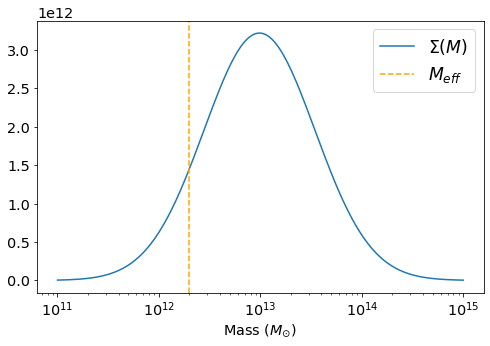

In [19]:
#Inputs
masses = np.logspace(11,15, num=200)

#Plot
plt.figure(figsize=(8,5));
plt.plot(masses, cib.capitalSigma(masses), label=r'$\Sigma(M)$');
plt.axvline(x = 10**12.3, ls='--', color='orange', label=r'$M_{eff}$')

#Plotting extras
plt.xscale('log')
plt.legend()
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.savefig('mass.png', bbox_inches='tight')

Although slight, the Gaussian is definitely asymmetric. You can increase the spread in the definition of $\Sigma$ to see the asymmetry more.

Of course, the function is also shifted to the right (see Aside #1 for more).

## Aside
This section demonstrates certain principles that went into making the above plot

1. The following compares a Gaussian with an x*Gaussian. Clearly, the multiplication of x shifts the mean to the right. It also scales the whole thing. Our $\Sigma$ doesn't look like this because it's Gaussian on a log scale already.

The peak of the Gaussian is 133 
The peak of the x*Gaussian is 145


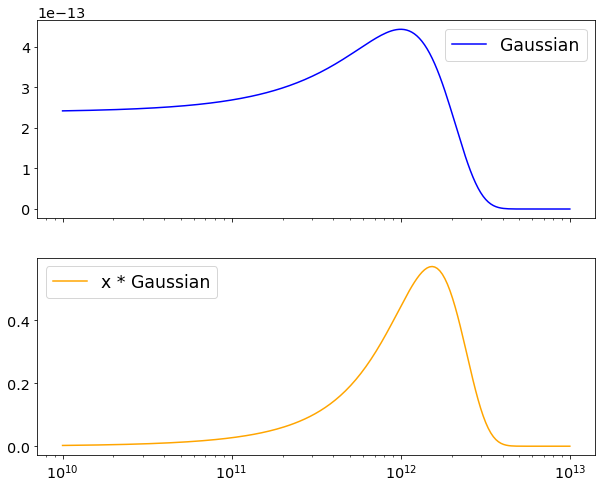

In [4]:
x = np.logspace(10,13, num=200)
mu = 1e12
sigma = 1e12 - 1e11

y1 = norm.pdf(x,mu,sigma)
y2 = x*norm.pdf(x,mu,sigma)

fig, axes = plt.subplots(2, sharex=True, figsize=(10,8))
axes[0].semilogx(x, y1, color='blue', label='Gaussian')
axes[1].semilogx(x, y2, color='orange' ,label='x * Gaussian')

axes[0].legend()
axes[1].legend()

print('The peak of the Gaussian is {} \nThe peak of the x*Gaussian is {}'.format(np.argmax(y1), np.argmax(y2)))

2. The following demonstrates the difference between a linspace and logspace on a linear and log plot scale

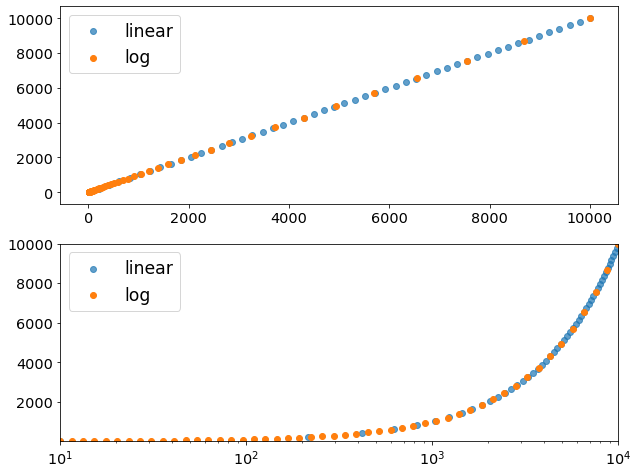

In [5]:
y = np.logspace(1, 4)
x = np.linspace(1e1, 1e4)

#Plotting
fig, ax = plt.subplots(2, figsize=(10,8))
for i in range(2):
    ax[i].scatter(x,x, label='linear', alpha=0.7)
    ax[i].scatter(y,y, label='log')
    ax[i].legend()

#Gravy
plt.xscale('log')
plt.xlim(10, 1e4)
plt.ylim(10, 1e4);

# L(M, z)

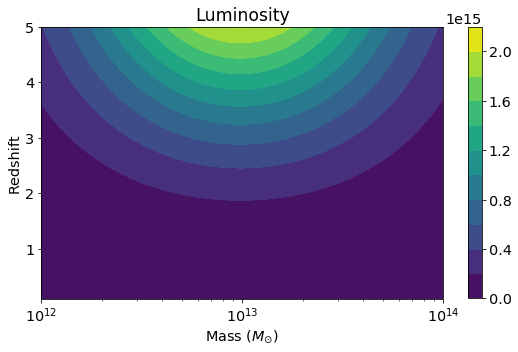

In [17]:
#Inputs
redshifts = np.linspace(0.1, 5)
masses = np.logspace(12,14, num=200)
freq = 545.0e9 #Ghz

#Calculations
M, Z = np.meshgrid(masses, redshifts)
L = cib.luminosity(M, Z, freq)

#Plot
plt.figure(figsize=(9,5));
plt.contourf(M, Z, L, 10)
plt.colorbar();

#Plotting extras
plt.xscale('log')
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.ylabel('Redshift')
plt.title('Luminosity');
plt.savefig('luminosity.png', bbox_inches='tight')

The dimensions of the SED function are power per steradian per area, in cgs. The luminosity function then has units of $M_{\odot}*\text{erg}*(s*sr*cm^2)^{-1}$